In [1]:
import os
from pathlib import Path

def root_dir(marker="EXPLib"):
    cwd = Path.cwd()
    # if cwd already contains the marker
    if (cwd / marker).is_dir():
        return cwd
    # otherwise walk up the parents
    for p in cwd.parents:
        if (p / marker).is_dir():
            return p
    raise FileNotFoundError(f"Root marker '{marker}' not found")

os.chdir(root_dir())
# print(os.getcwd())


In [2]:
from EXPLib.xai_library.model_explainers.search_algorithms.search_algos import random_search, grid_search, successive_halving, bayesian_optimization
from EXPLib.xai_library.model_explainers.search_algorithms.search_algos import swarm_search, simulated_annealing, genetic_search, plot_convergence
from itertools import product

In [5]:
import numpy as np

# Mock up examples of input V&V scenario's parameter (5 dimensionals)

## continuous input param space defined by ranges
param_bounds = {
    "x1": (-5, 15),
    "x2": (-3, 2),
    "x3": (-10, 1),
    "x4": (0, 101.28),   
    "x5": (-2, 3),
}

## Discrete (categorical) input space
param_space = {k: list(np.linspace(low, high, 25)) for k, (low, high) in param_bounds.items()}


# Mockup example of functions for testing search algorithms
def mockup_model_performance_estimate_function(params):
    x1, x2, x3, x4, x5 = params["x1"], params["x2"], params["x3"], params["x4"], params["x5"]
    term = np.sin(x4) * np.cos(x1) - 0.1 * (x1**2 + x2**2) + np.exp(-0.1 * (x3 - 3)**2)
    noise = np.random.normal(0, 0.05)
    return term + 0.5 * np.sin(x5 * np.pi) + noise


In [9]:
# The 'mockup_model_performance_estimate_function' is used for usage illustration only
# for practical application within AI-FSM, it shall be replaced with a real inference routine that:
#   - Accepts the scenario (specified by its parameters) as input.
#   - Run inference model to produce predictions.
#   - Computes and returns a safety-related performance metric (e.g. TTC, IoU...)

# Search algorithms here are designed to identify the scenario parameters that
# maximize this selected performance metric.  If one wants to find settings that
# minimize the metric instead, simply negate the evaluation function

parameter_eval = mockup_model_performance_estimate_function  

print("Parameters of found optimal input scenario by different search algorithms...")
ga_results = genetic_search(parameter_eval, param_space, population_size=20, generations=10)
ga_best = max(ga_results, key=lambda x: x[1])
print("Genetic search:", ga_best)

swarm_results = swarm_search(parameter_eval, param_bounds, num_particles=15, num_iterations=15)
swarm_best = max(swarm_results, key=lambda x: x[1])
print("Particle swarm:", swarm_best)

sa_results = simulated_annealing(parameter_eval, param_space, iterations=50)
sa_best = max(sa_results, key=lambda x: x[1])
print("Simulated annealing:", sa_best)


Parameters of found optimal input scenario by different search algorithms...
Genetic search: ({'x1': np.float64(0.0), 'x2': np.float64(2.0), 'x3': np.float64(0.5416666666666661), 'x4': np.float64(97.05999999999999), 'x5': np.float64(2.375)}, np.float64(1.014403504287636))
Particle swarm: ({'x1': np.float64(-0.09141548849497383), 'x2': np.float64(-0.41518673275677065), 'x3': np.float64(1.0), 'x4': np.float64(1.5069046875969123), 'x5': np.float64(2.47272524155858)}, np.float64(2.2654833203595937))
Simulated annealing: ({'x1': np.float64(1.666666666666667), 'x2': np.float64(-0.708333333333333), 'x3': np.float64(1.0), 'x4': np.float64(101.28), 'x5': np.float64(-1.7916666666666667)}, np.float64(0.6102560152930623))


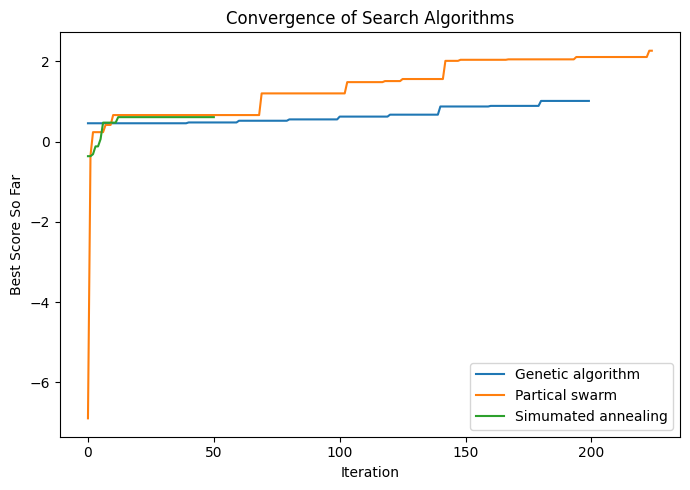

In [10]:
plot_convergence({
    "Genetic algorithm": ga_results,
    "Partical swarm": swarm_results,
    "Simumated annealing": sa_results,
})
